In [1]:
import numpy as np
import pylab as pl
%pylab inline
import scipy as sp
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(999)

mymean = 100.
mystdv = 10.
myallsample = {}
mysamplemean = []
for i in range(500):
    mydistrib = sp.stats.poisson.rvs(mymean, size=100)
    myallsample[np.mean(mydistrib)] = mydistrib
    mysamplemean.append(np.mean(mydistrib))

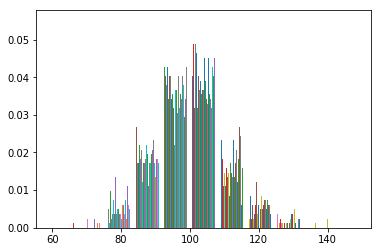

In [3]:
pl.hist(myallsample.values(),bins=11,normed=True);

## Figure1:Original poisson distribution

In [4]:
myallsample

{96.950000000000003: array([ 81,  98,  84,  90, 112, 108,  94, 117, 108, 100,  88,  99,  90,
        100,  92,  96,  96, 106,  85, 108,  79, 120,  81,  98, 115, 106,
         99,  99,  98,  98,  97,  90,  81,  82,  95, 100,  91, 100, 108,
         94,  93, 108,  88,  98, 101,  92, 100, 101, 101, 107, 108, 120,
         96, 104,  98,  85,  99, 110,  95,  90,  68,  91, 108,  92, 113,
         93, 101, 106,  89, 114,  98,  92,  92,  99, 101,  82,  93,  93,
         92, 113,  88,  92, 110,  92,  96, 104,  89, 111,  79, 107,  86,
         85,  96,  90,  70,  99, 100,  91, 106,  97]),
 97.239999999999995: array([ 91,  97, 115,  98, 105,  97, 111, 112,  88, 108, 103,  92,  89,
         92,  78,  96, 106,  77,  95,  82, 102,  76, 103, 109, 108,  97,
        101,  90,  99,  93,  88, 103,  79,  97,  87, 106,  94, 111, 105,
        105, 101, 110, 121, 108, 101,  86, 106, 102, 104,  77, 103,  87,
         96,  91,  93, 109,  99,  82,  81,  96, 101, 107, 100, 100,  90,
        101,  83,  83,  98,  

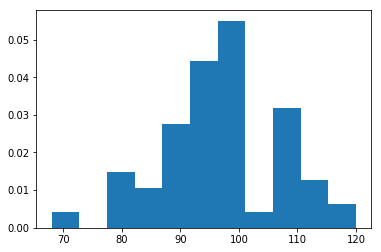

In [5]:
pl.hist(myallsample[96.950000000000003],bins=11,normed=True);

## Figure2:The distribution of one sample with mean=96.950000000000003

(array([ 0.00647249,  0.0420712 ,  0.12297735,  0.29449838,  0.38834951,
         0.33656958,  0.26537217,  0.1197411 ,  0.03236246,  0.00970874]),
 array([  96.95 ,   97.568,   98.186,   98.804,   99.422,  100.04 ,
         100.658,  101.276,  101.894,  102.512,  103.13 ]),
 <a list of 10 Patch objects>)

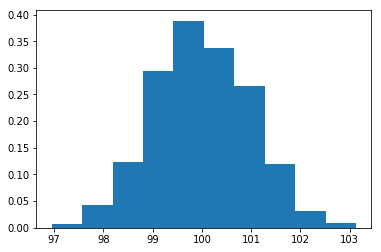

In [6]:
pl.hist(mysamplemean,bins=10,normed=True)

In [7]:
myzs = []
for i in range(len(mysamplemean)):
    zs = (mysamplemean[i] - mymean) * np.sqrt(100)/mystdv
    myzs.append(zs)


In [8]:
myzs

[1.7800000000000011,
 -1.1200000000000045,
 -1.1400000000000006,
 -0.76999999999999602,
 -0.030000000000001137,
 -0.31000000000000227,
 0.21999999999999886,
 -1.6099999999999994,
 -0.069999999999993179,
 -1.0799999999999983,
 -0.10999999999999943,
 -0.73000000000000398,
 0.42000000000000171,
 0.18999999999999773,
 1.2399999999999949,
 0.73999999999999488,
 -0.37000000000000455,
 -0.20000000000000284,
 0.59000000000000341,
 -0.37000000000000455,
 0.12000000000000455,
 -0.040000000000006253,
 -1.1800000000000068,
 0.14000000000000057,
 -0.85999999999999943,
 -1.019999999999996,
 -0.59000000000000341,
 -0.12999999999999545,
 -0.39000000000000057,
 -0.34999999999999432,
 0.45000000000000284,
 -1.0,
 -0.14000000000000057,
 0.39000000000000057,
 0.59000000000000341,
 -1.4000000000000057,
 0.75,
 -1.730000000000004,
 -0.049999999999997158,
 0.45000000000000284,
 -0.45000000000000284,
 0.90999999999999659,
 -1.9300000000000068,
 1.0999999999999943,
 -0.069999999999993179,
 -1.9500000000000028,

(array([ 0.00647249,  0.0420712 ,  0.12297735,  0.29449838,  0.38834951,
         0.33656958,  0.26537217,  0.1197411 ,  0.03236246,  0.00970874]),
 array([-3.05 , -2.432, -1.814, -1.196, -0.578,  0.04 ,  0.658,  1.276,
         1.894,  2.512,  3.13 ]),
 <a list of 10 Patch objects>)

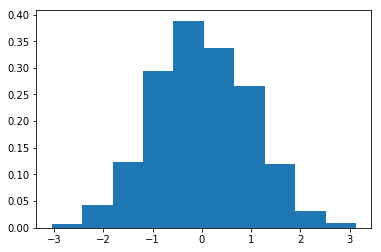

In [9]:
pl.hist(myzs,bins=10,normed=True)

## Figure3:Distribution of z statistics

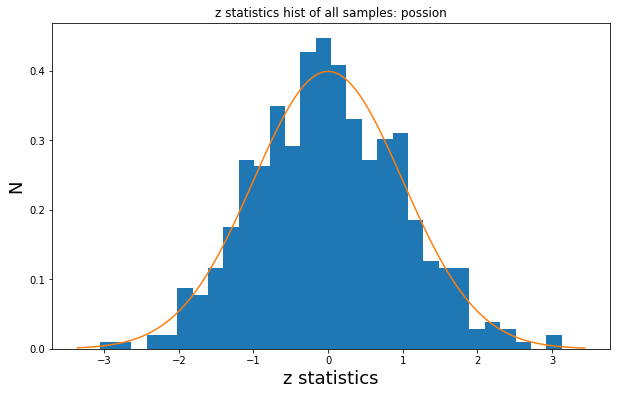

In [14]:
fitnorm1=pl.figure(figsize=(10,6)).add_subplot(111)
fitnorm1.hist(myzs,bins=30,normed=True)
fitnorm1.set_xlabel('z statistics', fontsize = 18)
fitnorm1.set_ylabel('N', fontsize = 18)
fitnorm1.set_title('z statistics hist of all samples: possion')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = sp.stats.norm.pdf(x)
fitnorm1.plot(x, y)

## Figure4:Fit the z-statistics with a gaussian model

## Assess the goodness of fit with KS test:
## H0:z statistics above follow the normal distribution (N(0,1))

In [13]:
sp.stats.kstest(myzs, 'norm')

KstestResult(statistic=0.023966473414113121, pvalue=0.93625992824936066)

## In this ks-test, we can see that the p-value is large, we fail to reject null hypothesis, hence the z statistics above follow the normal distribution (N(0,1))